In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4,m,1)
    time = np.linspace(0, 1, n_seq)
    series = 0.5 *np.cos((time-offsets1) * (freq1 * 10 + 10))
    series += 0.3 *np.sin((time-offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(m, n_seq)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [9]:
np.random.seed(1)
n_seq = 30
n_pred = 1

series = generate_time_series(5000, n_seq+n_pred)
series.shape

(5000, 31, 1)

In [10]:
x_train, y_train = series[:3000, :n_seq], series[:3000,-1]
x_valid,y_valid = series[3000:4000, :n_seq], series[3000:4000, -1]
x_test, y_test = series[4000:,:n_seq], series[4000:, -1]

In [11]:
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 1))

In [16]:
def plot_seq(x, y, y_pred=None):
    plt.plot(x, '.-')
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(n_seq, n_seq+ahead), y, 'go-', label='$y$')
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq+ahead), y_pred, 'rx-',
                label='$\hat y$', markersize=10)
    plt.hlines(0, 0, n_seq + ahead, linewidth = 1)
    plt.axis([0, n_seq +ahead, -1, 1])
    plt.grid(True)
    plt.legend(fontsize=14)

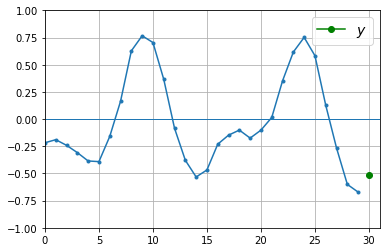

In [17]:
plot_seq(x_test[0, :, 0], y_test[0])

In [18]:
#1. Build model

In [20]:
np.random.seed(1)
tf.random.set_seed(1)

In [21]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1,input_shape=[None, 1])
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [22]:
#2. Compile

In [23]:
opt = keras.optimizers.Adam(learning_rate=0.05)

model.compile(loss='mse', optimizer=opt)

In [24]:
#3. Train

In [26]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 3s 18ms/step - loss: 0.0635 - val_loss: 0.0290
Epoch 2/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0298 - val_loss: 0.0291
Epoch 3/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0300 - val_loss: 0.0289
Epoch 4/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0300 - val_loss: 0.0287
Epoch 5/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0300 - val_loss: 0.0287
Epoch 6/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0300 - val_loss: 0.0285
Epoch 7/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0301 - val_loss: 0.0285
Epoch 8/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0301 - val_loss: 0.0285
Epoch 9/20
94/94 [==============================] - 1s 13ms/step - loss: 0.0298 - val_loss: 0.0286
Epoch 10/20
94/94 [==============================] - 1s 12ms/step - loss: 0.0302 - val_loss: 0.0305
Epoch 11/

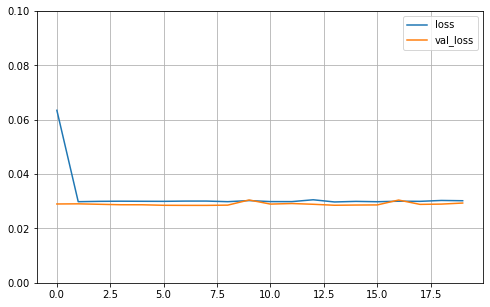

In [27]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [28]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0309


0.03094162419438362

In [29]:
y_pred = model.predict(x_test)

32/32 [==============================] - 0s 4ms/step


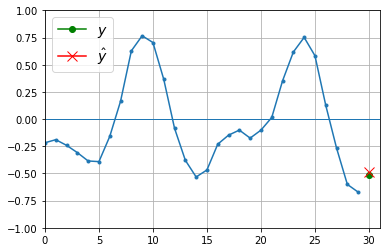

In [31]:
i = 0
plot_seq(x_test[i, : ,0], y_test[i], y_pred[i])

In [33]:
np.random.seed(1)
tf.random.set_seed(1)

In [34]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='mse',optimizer='adam')

In [37]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 8s 44ms/step - loss: 0.0450 - val_loss: 0.0144
Epoch 2/20
94/94 [==============================] - 3s 31ms/step - loss: 0.0117 - val_loss: 0.0098
Epoch 3/20
94/94 [==============================] - 3s 34ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 4/20
94/94 [==============================] - 3s 31ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 5/20
94/94 [==============================] - 3s 33ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 6/20
94/94 [==============================] - 3s 32ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 7/20
94/94 [==============================] - 3s 33ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 8/20
94/94 [==============================] - 3s 33ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 9/20
94/94 [==============================] - 3s 36ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 10/20
94/94 [==============================] - 3s 33ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 11/

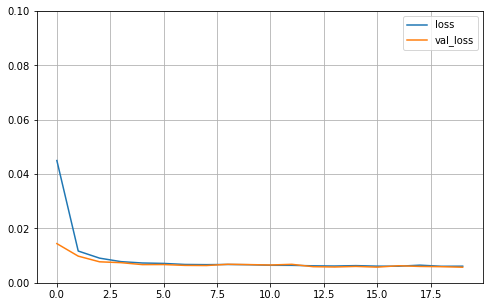

In [38]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [39]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 9ms/step - loss: 0.0063


0.006282043643295765

In [40]:
y_pred = model.predict(x_test)

32/32 [==============================] - 1s 8ms/step


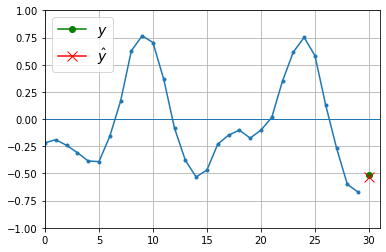

In [41]:
i = 0
plot_seq(x_test[i, : ,0], y_test[i], y_pred[i])

<font size=4>__**Deep RNN (dense output layer)**__</font>

In [42]:
np.random.seed(1)
tf.random.set_seed(1)

In [43]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='mse',optimizer='adam')

In [46]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 6s 31ms/step - loss: 0.0706 - val_loss: 0.0156
Epoch 2/20
94/94 [==============================] - 2s 24ms/step - loss: 0.0120 - val_loss: 0.0093
Epoch 3/20
94/94 [==============================] - 2s 23ms/step - loss: 0.0086 - val_loss: 0.0071
Epoch 4/20
94/94 [==============================] - 2s 25ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 5/20
94/94 [==============================] - 2s 24ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 6/20
94/94 [==============================] - 2s 24ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 7/20
94/94 [==============================] - 2s 23ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 8/20
94/94 [==============================] - 2s 23ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 9/20
94/94 [==============================] - 2s 24ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 10/20
94/94 [==============================] - 2s 24ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 11/

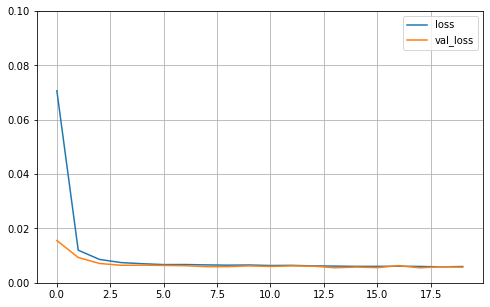

In [47]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [48]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 0.0061


0.006054014433175325

In [49]:
y_pred = model.predict(x_test)

32/32 [==============================] - 1s 7ms/step


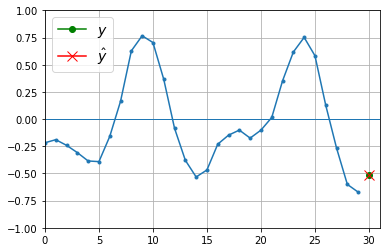

In [50]:
i = 0
plot_seq(x_test[i, : ,0], y_test[i], y_pred[i])